In [1]:
import pandas as pd 
import geopandas as gpd 
from shapely.geometry import Point, Polygon

gw_df = pd.read_csv("../../notebooks-and-markdowns/gw_final_df.csv")

In [2]:
gw_df = gw_df[gw_df['SoilMoi0_10cm_inst'].notnull()]

In [18]:
gw_df
df_subset = gw_df[gw_df['time']=='2008-07-01']
df_subset

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,d_SWE_inst_meters,d_SoilMoi0_10cm_inst_meters,lwe,gw_estimate
83232,2008-07-01,-104.875,41.125,-5.297097,0.0,12.807230,31.064790,45.036983,158.994430,-2.977335,-4.988203,-0.297734,-0.498820,-0.052971,0.743583
83233,2008-07-01,-104.875,41.375,-5.297097,0.0,12.217411,29.740040,43.342125,153.954220,-2.977335,-5.578022,-0.297734,-0.557802,-0.052971,0.802565
83234,2008-07-01,-104.625,41.125,-5.297097,0.0,13.402911,33.947536,46.705850,160.348590,-2.977335,-4.392522,-0.297734,-0.439252,-0.052971,0.684015
83235,2008-07-01,-104.625,41.375,-5.297097,0.0,12.735605,31.999556,44.052032,154.951130,-2.977335,-5.059828,-0.297734,-0.505983,-0.052971,0.750745
83236,2008-07-01,-106.875,34.625,-12.145323,0.0,10.252262,28.160286,43.894608,98.976326,-2.977335,-7.543171,-0.297734,-0.754317,-0.121453,0.930597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84383,2008-07-01,-108.125,36.875,-12.145323,0.0,12.380476,32.040920,63.964615,186.530760,-2.977335,-5.414957,-0.297734,-0.541496,-0.121453,0.717776
84384,2008-07-01,-106.875,39.625,-20.240255,0.0,11.113342,29.492056,59.658993,143.999850,-2.977335,-6.682091,-0.297734,-0.668209,-0.202403,0.763540
84385,2008-07-01,-106.875,39.875,-20.240255,0.0,12.123234,32.418530,65.184980,177.476400,-2.977335,-5.672199,-0.297734,-0.567220,-0.202403,0.662551
84386,2008-07-01,-106.625,39.625,-20.240255,0.0,11.901016,32.601700,65.838590,93.147050,-2.977335,-5.894417,-0.297734,-0.589442,-0.202403,0.684773


In [19]:
#df_subset.plot(x=df_subset.lon, y=df_subset.lat)
geometry = [Point(xy) for xy in zip(df_subset['lon'], df_subset['lat'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df_subset, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,d_SWE_inst_meters,d_SoilMoi0_10cm_inst_meters,lwe,gw_estimate,geometry
83232,2008-07-01,-104.875,41.125,-5.297097,0.0,12.807230,31.064790,45.036983,158.994430,-2.977335,-4.988203,-0.297734,-0.498820,-0.052971,0.743583,POINT (-104.87500 41.12500)
83233,2008-07-01,-104.875,41.375,-5.297097,0.0,12.217411,29.740040,43.342125,153.954220,-2.977335,-5.578022,-0.297734,-0.557802,-0.052971,0.802565,POINT (-104.87500 41.37500)
83234,2008-07-01,-104.625,41.125,-5.297097,0.0,13.402911,33.947536,46.705850,160.348590,-2.977335,-4.392522,-0.297734,-0.439252,-0.052971,0.684015,POINT (-104.62500 41.12500)
83235,2008-07-01,-104.625,41.375,-5.297097,0.0,12.735605,31.999556,44.052032,154.951130,-2.977335,-5.059828,-0.297734,-0.505983,-0.052971,0.750745,POINT (-104.62500 41.37500)
83236,2008-07-01,-106.875,34.625,-12.145323,0.0,10.252262,28.160286,43.894608,98.976326,-2.977335,-7.543171,-0.297734,-0.754317,-0.121453,0.930597,POINT (-106.87500 34.62500)


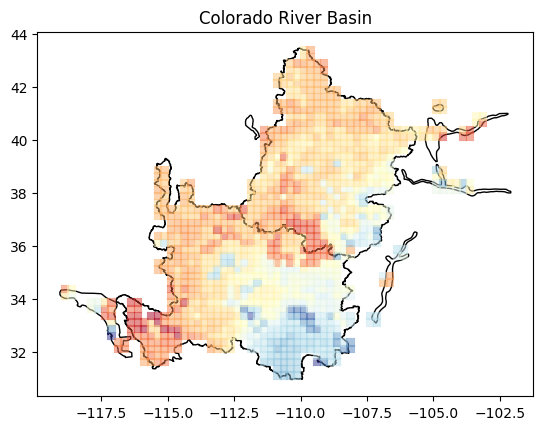

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

shpfl = gpd.read_file("/home/kmk58/remoteData/shapefiles/Colorado_River_Basin_Hydrological_Boundaries_with_Areas_served_by_Colorado_River.shp")
#ax = shpfl.plot()

# plot of entire Colorado River Basin
plt.style.use('default')
#plt.figure(figsize=[10,10])
#basemap = 

shpfl.plot(facecolor='none', edgecolor='black')
#ax.set_axis_off()
plt.title("Colorado River Basin")
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()
plt.scatter(geo_df["lon"],geo_df["lat"], marker='s', c=geo_df.gw_estimate, cmap='RdYlBu_r', alpha=.5, linewidth=.1, label=geo_df.gw_estimate)
#sp = geo_df.plot(marker='o', facecolor='none',color='red', markersize=1)

#sp.plot(basemap,color='red', markersize=1)
#sp.plot()

/home/kmk58/.local/lib/python3.11/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


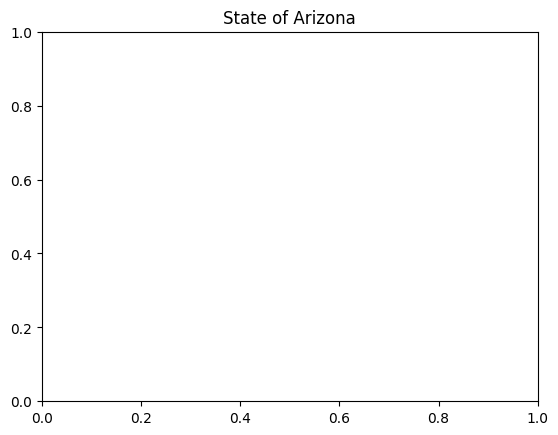

In [36]:
shpfl_az = gpd.read_file("/home/kmk58/data/tl_rd22_04_cd118.shp")

# plot of entire Colorado River Basin
#plt.style.use('default')
#plt.figure(figsize=[10,10])
#shpfl.plot(facecolor='none', edgecolor='black')
#shpfl_az.plot(facecolor='none', edgecolor='black').set_axis_off()
plt.title("State of Arizona")
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()

geo_df = geo_df.to_crs(shpfl_az.crs)
test = gpd.sjoin(shpfl_az, geo_df, how='left', op='intersects')
#grace_shp_df = df_subset[df_subset.intersects(shpfl_az['geometry'])]

#plt.scatter(grace_shp_df["lon"],grace_shp_df["lat"], marker='s', c=grace_shp_df.gw_estimate, cmap='RdYlBu_r', alpha=.5, linewidth=.1, label=grace_shp_df.gw_estimate)